In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import os

main_dir = 'C:\\Users\\parks\\Desktop\\대학\\4학년 1학기\\ml\\7week'

dataFrame = pd.read_csv(os.path.join(main_dir, "Mall_Customers.csv"))

In [142]:
data = dataFrame[['Annual Income (k$)', 'Spending Score (1-100)']]

In [143]:
k = 3 # Clustering 갯수

In [144]:
# 그릅 수, k-means++ 방식, random_state( 난수 고정)
model = KMeans(n_clusters = k, init='k-means++', random_state= 10)

In [145]:
dataFrame['cluster'] = model.fit_predict(data)

In [146]:
dataFrame

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [147]:
final_centroid = model.cluster_centers_

In [148]:
# numpy. ndrray
print(final_centroid)

[[44.15447154 49.82926829]
 [87.         18.63157895]
 [86.53846154 82.12820513]]


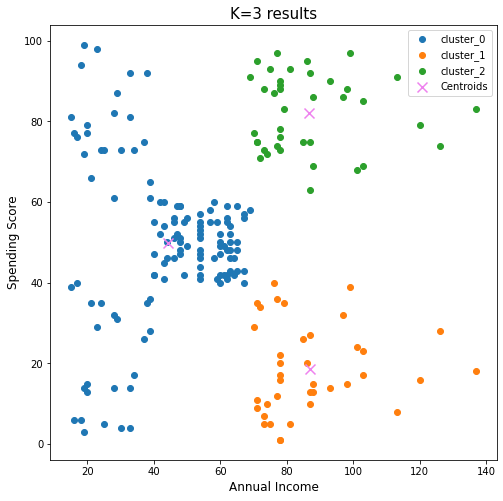

In [149]:
plt.figure(figsize=(8,8))
for i in range(k):
    plt.scatter(dataFrame.loc[dataFrame['cluster'] == i, 'Annual Income (k$)'], dataFrame.loc[dataFrame['cluster'] == i, 'Spending Score (1-100)'], label="cluster_"+str(i))
plt.scatter(final_centroid[:,0], final_centroid[:,1], s=100, c='violet', marker='x', label="Centroids")
plt.legend()
plt.title(f'K={k} results', size=15)
plt.xlabel('Annual Income', size=12)
plt.ylabel('Spending Score', size=12)
plt.show()

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


269981.28000000014
181363.59595959607
106348.37306211119
73679.78903948837
44448.45544793369
37265.86520484345
30259.657207285458
25095.703209997544
21830.04197804944
20736.67993892413


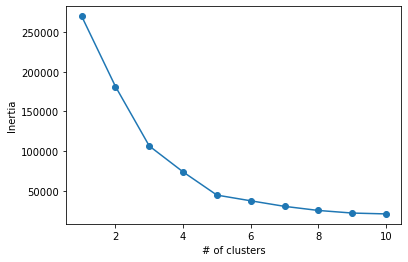

In [150]:
def elbow(x):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        print(km.inertia_)
    plt.plot(range(1,11), sse, marker = 'o')
    plt.xlabel("# of clusters")
    plt.ylabel("Inertia")
    plt.show()
elbow(data)

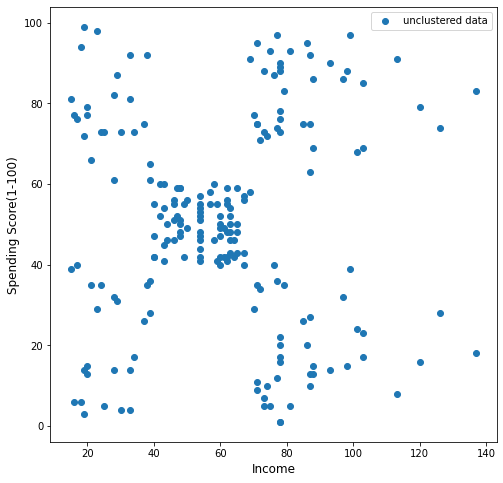

In [151]:
data['Annual Income (k$)'], data['Spending Score (1-100)']
plt.figure(figsize=(8,8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], label='unclustered data')
plt.legend(loc = 'upper right')
plt.xlabel('Income', size=12)
plt.ylabel('Spending Score(1-100)', size=12)
plt.show()

In [160]:
K=3
iteration = 100
data_set = data.to_numpy()
def get_random_clusters(k):
    data_length = len(data)
     
    rand_indexes = [random.randrange(0, data_length) for _ in range(k)]
    print("rand indexes : ",rand_indexes)
    return data_set[rand_indexes]

cluster_centroid =  get_random_clusters(k)
print(cluster_centroid)

rand indexes :  [64, 114, 117]
[[48 51]
 [65 48]
 [65 59]]


In [211]:
def euclidean_dist(data, centroid):
    result = list(map(lambda x: sum(x), (centroid - data) ** 2))
    return np.argmin(result)
def manhattan_dist():
    pass

def find_mean(cluster_list, features):
    result = np.array([[0 for _ in range(features)] for _ in range(len(cluster_list))])
            
    for i in range(len(cluster_list)):
        length = len(cluster_list[i])
        for d in cluster_list[i]:
            result[i] = [result[i][f] + d[f] for f in range(features)]
            # result[i] += d
        result[i] = [result[i][f] / length for f in range(features)]
        # result[i] = result[i]/length

    return result


In [247]:
def clustering(data_set, cluster_centroid, k):
    old_list = [[] for _ in range(k)]
    features = data_set.shape[1]
    for i in range(iteration):
        cluster_list = [[] for _ in range(k)]
        
        for d in data_set:
            cluster_index = euclidean_dist(d,cluster_centroid)
            cluster_list[cluster_index].append(d)

        if np.array_equal(old_list,cluster_list):
            return cluster_list, cluster_centroid, i
        
        cluster_centroid = find_mean(cluster_list, features)
        old_list = cluster_list.copy() 
        
    return cluster_list, cluster_centroid, i
f_cluster_list, f_cluster_centroid, final_index = clustering(data_set, cluster_centroid, k)

print(f_cluster_centroid)

[[44 49]
 [87 18]
 [86 82]]


In [ ]:
plt.figure(figsize=(8,8))
for cluster in f_cluster_list:
    cluster = np.array(cluster).T
    plt.scatter(cluster[0], cluster[1], label="cluster_"+str(i))
    
final_centroid = np.array(f_cluster_centroid).T
plt.scatter(final_centroid[0], final_centroid[1], s=100, c='violet', marker='x', label="Centroids")
plt.legend()
plt.title(f'K={k} results', size=15)
plt.xlabel('Annual Income', size=12)
plt.ylabel('Spending Score', size=12)
plt.show()

In [249]:
a = [[1,2],[3,4]]
sum(a)

TypeError: unsupported operand type(s) for +: 'int' and 'list'